12649 262144


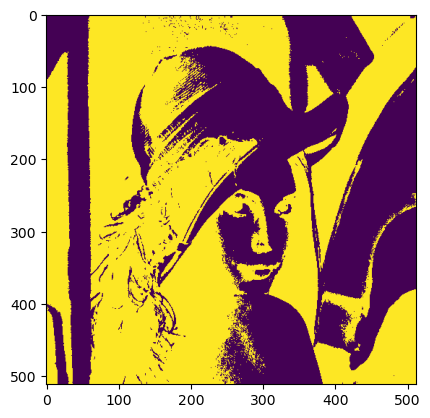

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

pixels = np.asarray(imread('lenna.png'))
rgb2gray = np.asarray([0.2126, 0.7152, 0.0722]).reshape([1,1,3])
gpixels = np.tensordot(pixels, rgb2gray, axes=([2], [2])).squeeze()
bwpixels = gpixels > 0.5

def compress_bwpixels(bwimage):
    compressed = []
    flag = None
    count = 0
    for x in np.nditer(bwimage):
        if x != flag:
            compressed.append(count)
            count = 0
        count += 1
        flag = x
    compressed.append(count)
    return compressed

def decompress_bwpixels(bwcompressed):
    image = []
    flag = True
    for width in bwcompressed:
        image += [flag] * width
        flag = not flag
    return np.asarray(image).reshape([512, 512])

compressed = compress_bwpixels(bwpixels)
print(len(compressed), 512 * 512)
decompressed = decompress_bwpixels(compressed)
plt.imshow(decompressed)

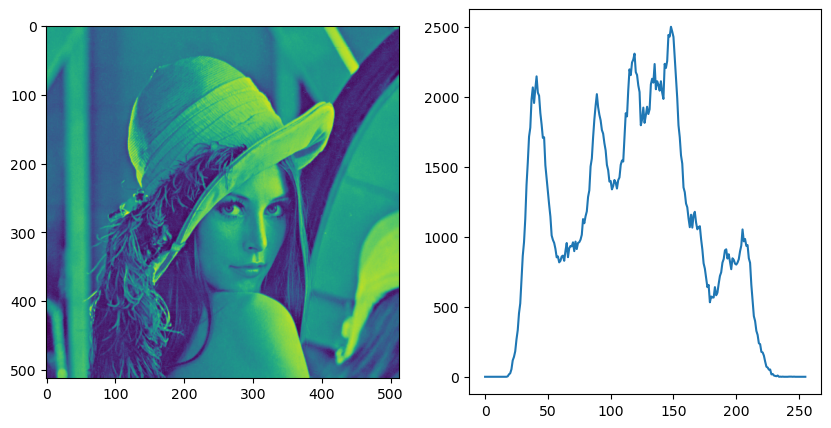

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

y, x = np.histogram((255 * gpixels).astype('uint8'), bins=256, range=(0, 256))

axs[0].imshow(gpixels)
axs[1].plot(x[:-1], y)

plt.show()

<BarContainer object of 256 artists>

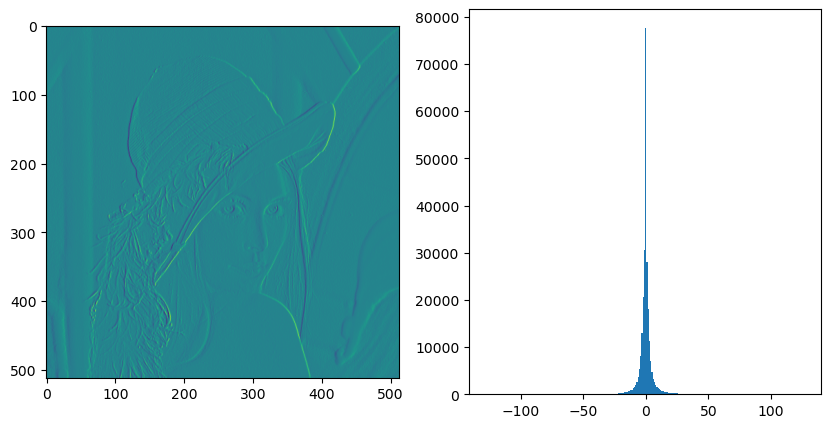

In [4]:
def difference_coding(xs):
    output = [xs.flat[0]]
    for i in range(1, len(xs.flat)):
        output.append(xs.flat[i - 1] - xs.flat[i])
    return output

def difference_encoding(ndiffs, initial=None):
    image = [initial or ndiffs.flat[0]]
    for i in range(1, len(ndiffs.flat)):
        image.append(image[i - 1] - ndiffs.flat[i])
    return np.asarray(image).reshape(512, 512)

dc = difference_coding(gpixels)
ndc = np.asarray(dc).reshape(512, 512)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data = (127 * ndc).astype('int8')
hist_data, bins = np.histogram(data, bins=256, range=(-128, 128))

axs[0].imshow((127 * ndc))
axs[1].bar(bins[:-1], hist_data, width=np.diff(bins))
# axs[1].plot(x[:-1], y)


<BarContainer object of 512 artists>

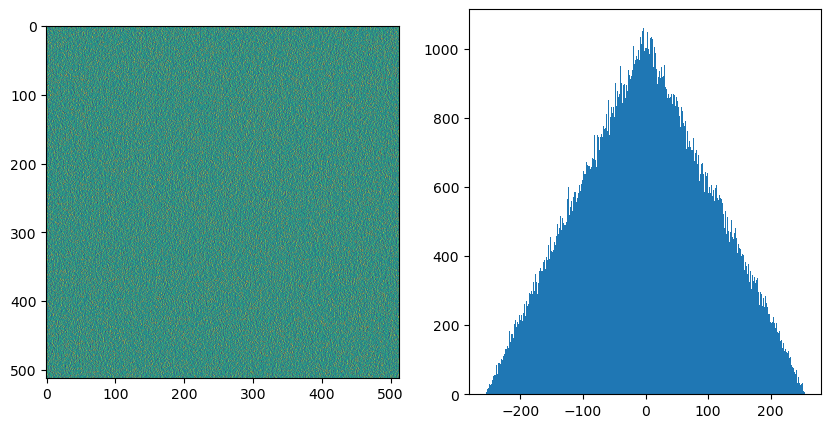

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

noise_image = (256 * np.random.rand(512, 512)).astype('int32')

def npwrap(xs):
    return np.asarray(xs).reshape(512, 512)

t = noise_image
for i in range(1):
    t = npwrap(difference_coding(t))

hist_data, bins = np.histogram(t, bins=512, range=(-256, 256))

axs[0].imshow(t)
axs[1].bar(bins[:-1], hist_data, width=np.diff(bins))

### Difference distribution
```raw
Pr[diff = 0] = Pr[(0, 0)] + Pr[(1,1)] + Pr[(2,2)] + ... + Pr[(255, 255)]
...
Pr[diff = 255] = Pr[(255, 0)]
Pr[diff = -255] = Pr[(0, 255)]
```

<BarContainer object of 512 artists>

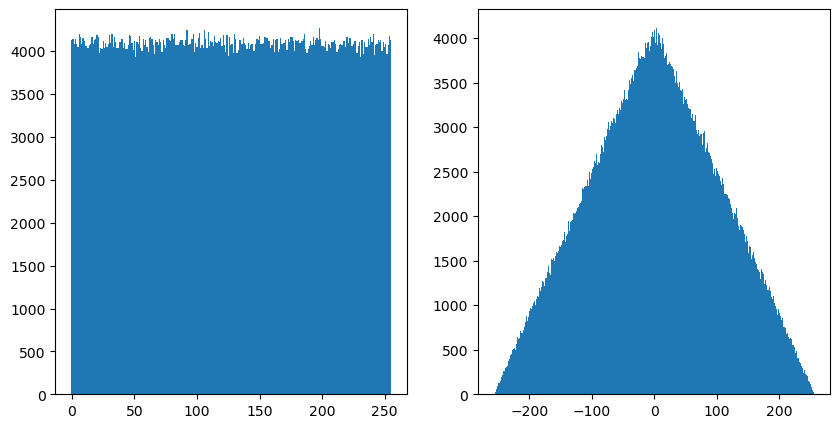

In [6]:
from random import randint

rxs = [randint(0, 255) for i in range(2**20)]
diffs = [rxs[0]]
for i in range(2**20):
    diffs.append(randint(0, 255) - randint(0, 255))
r_hd, r_bs = np.histogram(rxs, bins=256, range=(0, 256))
d_hd, d_bs = np.histogram(diffs, bins=512, range=(-256, 256))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(r_bs[:-1], r_hd, width=np.diff(r_bs))
axs[1].bar(d_bs[:-1], d_hd, width=np.diff(d_bs))

# Entropy of discrete variables

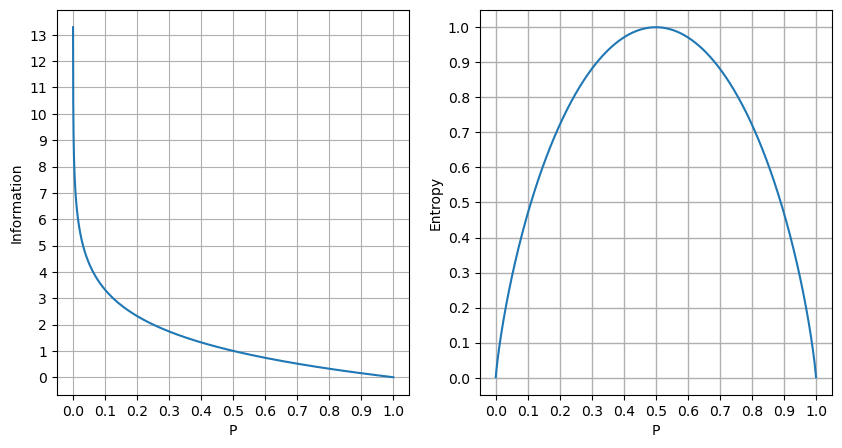

In [36]:
from math import *

def surprise(probability):
    return log2(1 / probability)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

probs = [x / 10000 for x in range(1, 10000)]
surps = [surprise(p) for p in probs]
entro = [(p * surprise(p)) + ((1 - p) * surprise(1 - p)) for p in probs]

axs[0].plot(probs, surps)
axs[0].set_xlabel('P')
axs[0].set_ylabel('Information')
axs[0].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].xaxis.set_major_locator(plt.MultipleLocator(0.1))
axs[0].grid()

axs[1].plot(probs, entro)
axs[1].set_xlabel('P')
axs[1].set_ylabel('Entropy')
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].grid(linewidth=1)

In [39]:
xs = np.arange(100)
print(np.sum(xs * 1/100))

49.49999999999999
